In [77]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [78]:
veri = pd.read_csv('Churn_Modelling.csv')

In [79]:
veri.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [80]:
veri.shape

(10000, 14)

In [81]:
veri.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [82]:
from pandas_profiling import ProfileReport
veri.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [83]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [84]:
veri.nunique(axis=0)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [85]:
print("From all {all} customers, {num} of them are unique.".format(all = len(veri),num = len(veri.CustomerId.unique())))

From all 10000 customers, 10000 of them are unique.


In [86]:
veri.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

RowNumber       CustomerId   CreditScore           Age  \
count  10000.000000     10000.000000  10000.000000  10000.000000   
mean    5000.500000  15690940.569400    650.528800     38.921800   
std     2886.895680     71936.186123     96.653299     10.487806   
min        1.000000  15565701.000000    350.000000     18.000000   
25%     2500.750000  15628528.250000    584.000000     32.000000   
50%     5000.500000  15690738.000000    652.000000     37.000000   
75%     7500.250000  15753233.750000    718.000000     44.000000   
max    10000.000000  15815690.000000    850.000000     92.000000   

             Tenure        Balance NumOfProducts     HasCrCard IsActiveMember  \
count  10000.000000   10000.000000  10000.000000  10000.000000   10000.000000   
mean       5.012800   76485.889288      1.530200      0.705500       0.515100   
std        2.892174   62397.405202      0.581654      0.455840       0.499797   
min        0.000000       0.000000      1.000000      0.000000       0.000000   
25%        3.000000       0.000000      1.000000      0.000000       0.000000   
50%        5.000000   97198.540000      1.000000      1.000000       1.000000   
75%        7.000000  127644.240000      2.000000      1.000000       1.000000   
max       10.000000  250898.090000      4.000000      1.000000       1.000000   

      EstimatedSalary        Exited  
count    10000.000000  10000.000000  
mean    100090.239881      0.203700  
std      57510.492818      0.402769  
min         11.580000      0.000000  
25%      51002.110000      0.000000  
50%     100193.915000      0.000000  
75%     149388.247500      0.000000  
max     199992.480000      1.000000

In [87]:
veri.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

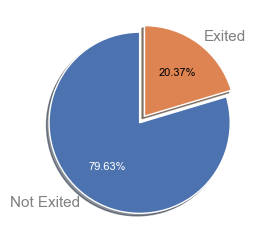

In [88]:
values = veri.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

c:\Users\samiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\samiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\samiy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\samiy\anaconda3\lib\si

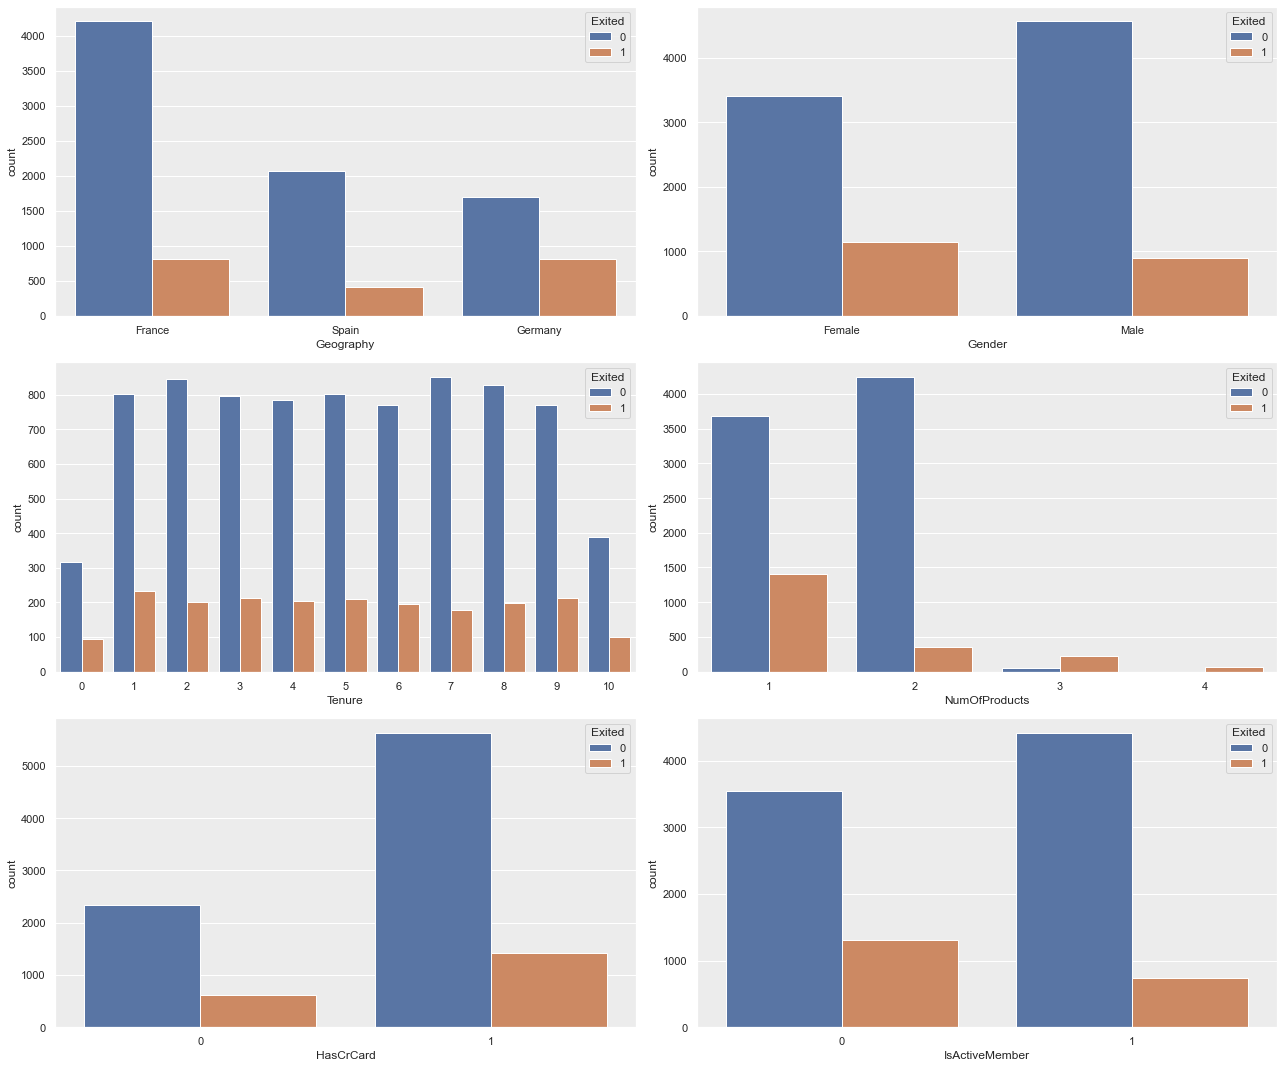

In [89]:
fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = veri, ax = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = veri, ax = ax[0][1])
sns.countplot('Tenure', hue = 'Exited', data = veri, ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = veri, ax = ax[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = veri, ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = veri, ax = ax[2][1])

plt.tight_layout()
plt.show()

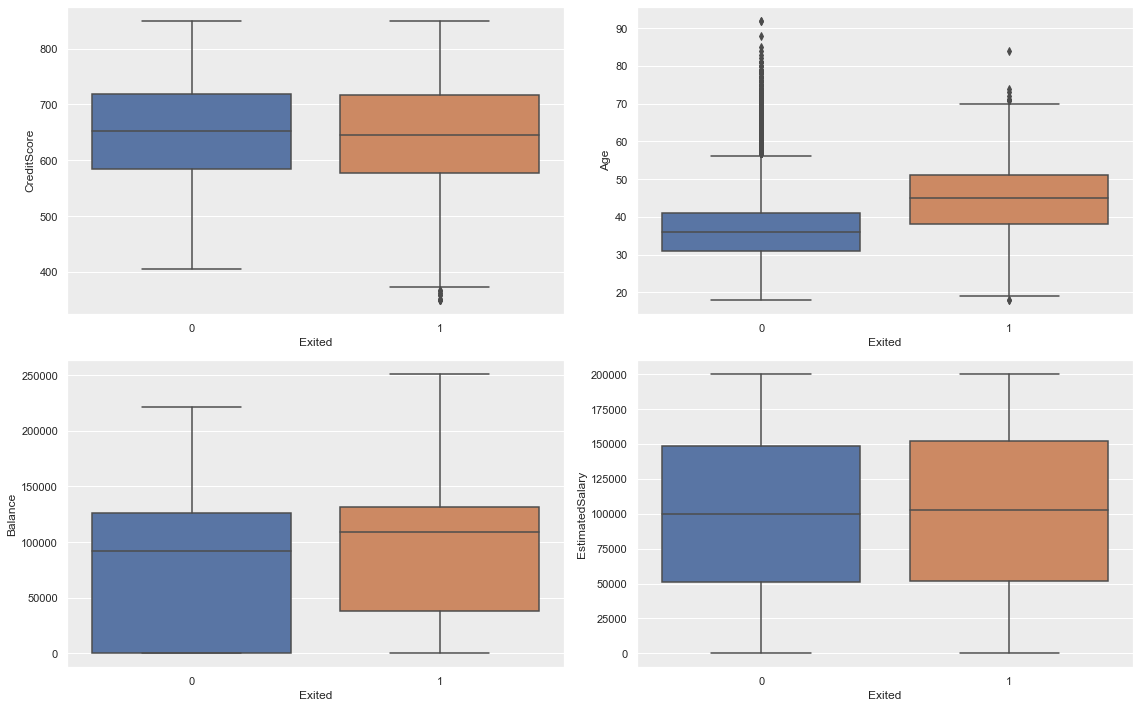

In [90]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = veri, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = veri, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = veri, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = veri, ax = ax[1][1])

plt.tight_layout()
plt.show()

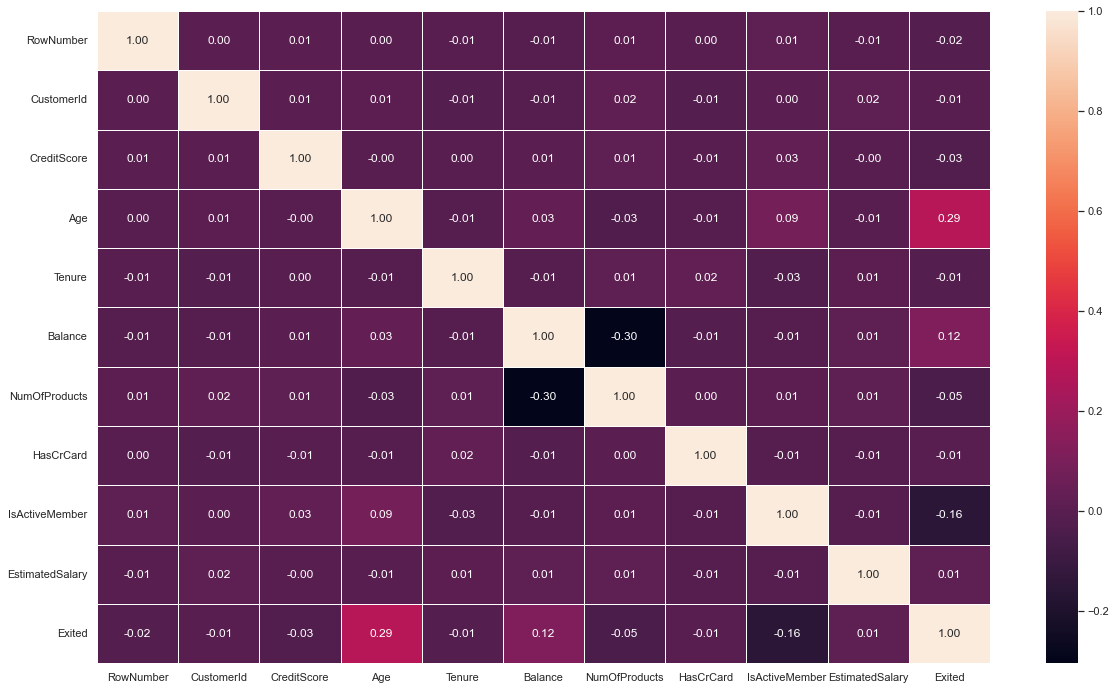

In [91]:
plt.figure(figsize = (20, 12))

corr = veri.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [92]:
veri.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
veri.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [93]:
veri.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [94]:
veri = pd.get_dummies(data = veri, columns = ['Geography', 'Gender']) #Kategorik verileri dönüştürme
veri.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2                  0                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0

In [95]:
veri = veri[veri['Age'] < 85.0] #Çok sapmış outliers düzeltme veriden çıkararak
veri.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) #Bu kod ileri seviye kod bilgisi gerektirir demiştin. Silmedim yinede
#Verinin describe()' dan sonra ondalık halinde gözükmesini sağlıyor  

CreditScore          Age       Tenure        Balance NumOfProducts  \
count  9996.000000  9996.000000  9996.000000    9996.000000   9996.000000   
mean    650.513205    38.901661     5.012405   76491.727024      1.530112   
std      96.646238    10.441290     2.891544   62396.913388      0.581690   
min     350.000000    18.000000     0.000000       0.000000      1.000000   
25%     584.000000    32.000000     3.000000       0.000000      1.000000   
50%     652.000000    37.000000     5.000000   97198.540000      1.000000   
75%     717.250000    44.000000     7.000000  127651.035000      2.000000   
max     850.000000    84.000000    10.000000  250898.090000      4.000000   

         HasCrCard IsActiveMember EstimatedSalary       Exited  \
count  9996.000000    9996.000000     9996.000000  9996.000000   
mean      0.705482       0.514906   100090.326910     0.203782   
std       0.455849       0.499803    57508.154376     0.402829   
min       0.000000       0.000000       11.580000     0.000000   
25%       0.000000       0.000000    51002.110000     0.000000   
50%       1.000000       1.000000   100193.915000     0.000000   
75%       1.000000       1.000000   149388.247500     0.000000   
max       1.000000       1.000000   199992.480000     1.000000   

      Geography_France Geography_Germany Geography_Spain Gender_Female  \
count      9996.000000       9996.000000     9996.000000   9996.000000   
mean          0.501301          0.251000        0.247699      0.454382   
std           0.500023          0.433610        0.431698      0.497940   
min           0.000000          0.000000        0.000000      0.000000   
25%           0.000000          0.000000        0.000000      0.000000   
50%           1.000000          0.000000        0.000000      0.000000   
75%           1.000000          1.000000        0.000000      1.000000   
max           1.000000          1.000000        1.000000      1.000000   

       Gender_Male  
count  9996.000000  
mean      0.545618  
std       0.497940  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [96]:
veri[['Age']].agg(['skew', 'kurtosis']).transpose() #Basıklık ve çarpıklık olarak açıklayabiliriz. Normal dağılıma yakın olması için
#skewness 0'a kurtosis ise 3'e yakın olması gerekir ama kesin bir değer aralığına girmesi gerekmiyor veriye göre değişir.

skew  kurtosis
Age  0.98581  1.263047

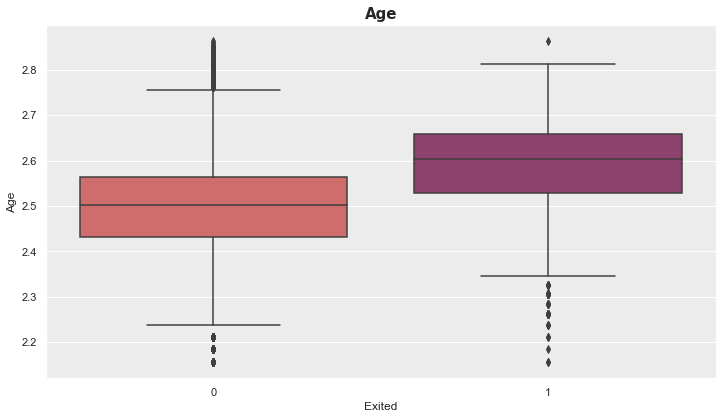

In [98]:
veri['Age'] = boxcox(veri['Age'])[0] #Boxcox transforming tekniği
sns.set(rc={'axes.facecolor':'#ECECEC'}) 
plt.figure(figsize=(12,6.5)) 
plt.title('Age', fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.boxplot(x=veri['Exited'], y = veri['Age'], data = veri, palette="flare")

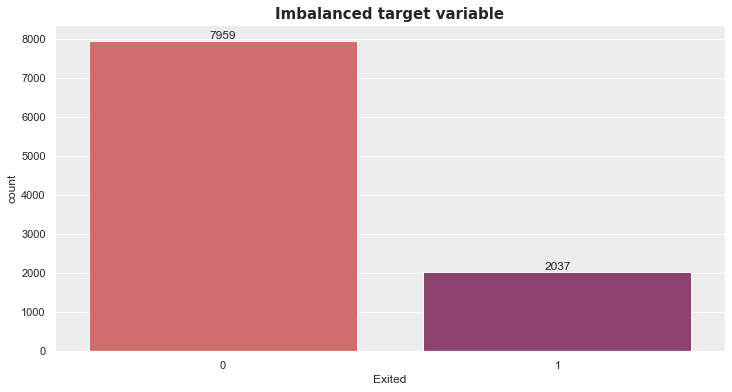

In [99]:
sns.set(rc={'axes.facecolor':'#ECECEC'})
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=veri['Exited'], data=veri, palette="flare")

abs_values = veri['Exited'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

plt.show()                                                                                

In [100]:
columns = ['CreditScore', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary']
y = veri['Exited'] 
X = veri[columns] 

ros = RandomOverSampler(sampling_strategy='minority') #Exited column dengesiz olduğundan bu rastgele örnekleme ile dengelenir.
X_train_balanced, y_train_balanced = ros.fit_resample(X, y)     
print(f"Imbalanced target class: {(y)}\n\nBalanced target class: {Counter(y_train_balanced)}\n")
print(X_train_balanced.shape[0] - veri.shape[0], 'new random picked points')

Imbalanced target class: 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9996, dtype: int64

Balanced target class: Counter({1: 7959, 0: 7959})

5922 new random picked points


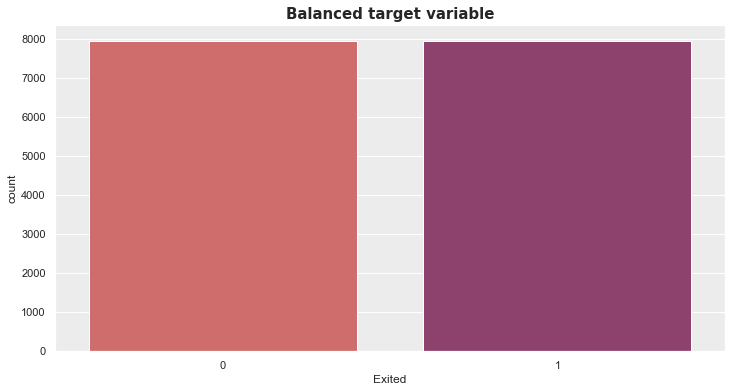

In [101]:
sns.set(rc={'axes.facecolor':'#ECECEC'}) 
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=y_train_balanced, data=veri, palette="flare")
plt.show()

In [2]:
from sklearn.model_selection import train_test_split #Hata sebebi bu kodu çekirdekten ayrıldıktan sonra tekrar çalıştırdım.
#Ama komple tekrar çalıştırmadım çünkü eğitim çok uzun sürüyor. 700 dakika sürdü biri.
X_train,X_test,y_train,y_test = train_test_split(X_train_balanced, y_train_balanced,test_size=0.3, random_state = 1453)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

NameError: name 'X_train_balanced' is not defined

In [103]:
threshold = 0.9

corr_matrix = X_train.corr().abs()
corr_matrix.head(len(columns)+2)

CreditScore  Geography_France  Geography_Germany  \
CreditScore           1.000000          0.006811           0.011235   
Geography_France      0.006811          1.000000           0.624321   
Geography_Germany     0.011235          0.624321           1.000000   
Geography_Spain       0.020566          0.502022           0.362174   
Gender_Female         0.010652          0.009843           0.029508   
Gender_Male           0.010652          0.009843           0.029508   
Age                   0.007661          0.057711           0.081575   
Tenure                0.006400          0.017430           0.004763   
Balance               0.002804          0.265172           0.420375   
NumOfProducts         0.003528          0.015012           0.028044   
HasCrCard             0.012005          0.001939           0.004729   
EstimatedSalary       0.034071          0.004689           0.014851   

                   Geography_Spain  Gender_Female  Gender_Male       Age  \
CreditScore               0.020566       0.010652     0.010652  0.007661   
Geography_France          0.502022       0.009843     0.009843  0.057711   
Geography_Germany         0.362174       0.029508     0.029508  0.081575   
Geography_Spain           1.000000       0.020924     0.020924  0.021452   
Gender_Female             0.020924       1.000000     1.000000  0.056410   
Gender_Male               0.020924       1.000000     1.000000  0.056410   
Age                       0.021452       0.056410     0.056410  1.000000   
Tenure                    0.015525       0.025676     0.025676  0.015248   
Balance                   0.148999       0.014614     0.014614  0.042658   
NumOfProducts             0.013135       0.024481     0.024481  0.026390   
HasCrCard                 0.007549       0.010484     0.010484  0.022439   
EstimatedSalary           0.010846       0.018460     0.018460  0.004606   

                     Tenure   Balance  NumOfProducts  HasCrCard  \
CreditScore        0.006400  0.002804       0.003528   0.012005   
Geography_France   0.017430  0.265172       0.015012   0.001939   
Geography_Germany  0.004763  0.420375       0.028044   0.004729   
Geography_Spain    0.015525  0.148999       0.013135   0.007549   
Gender_Female      0.025676  0.014614       0.024481   0.010484   
Gender_Male        0.025676  0.014614       0.024481   0.010484   
Age                0.015248  0.042658       0.026390   0.022439   
Tenure             1.000000  0.002909       0.024286   0.014675   
Balance            0.002909  1.000000       0.183864   0.016499   
NumOfProducts      0.024286  0.183864       1.000000   0.005607   
HasCrCard          0.014675  0.016499       0.005607   1.000000   
EstimatedSalary    0.019613  0.002278       0.020337   0.013961   

                   EstimatedSalary  
CreditScore               0.034071  
Geography_France          0.004689  
Geography_Germany         0.014851  
Geography_Spain           0.010846  
Gender_Female             0.018460  
Gender_Male               0.018460  
Age                       0.004606  
Tenure                    0.019613  
Balance                   0.002278  
NumOfProducts             0.020337  
HasCrCard                 0.013961  
EstimatedSalary           1.000000

In [104]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))#Üçgen şeklinde corr_matrix
upper.head(len(columns)+2)

CreditScore  Geography_France  Geography_Germany  \
CreditScore                NaN          0.006811           0.011235   
Geography_France           NaN               NaN           0.624321   
Geography_Germany          NaN               NaN                NaN   
Geography_Spain            NaN               NaN                NaN   
Gender_Female              NaN               NaN                NaN   
Gender_Male                NaN               NaN                NaN   
Age                        NaN               NaN                NaN   
Tenure                     NaN               NaN                NaN   
Balance                    NaN               NaN                NaN   
NumOfProducts              NaN               NaN                NaN   
HasCrCard                  NaN               NaN                NaN   
EstimatedSalary            NaN               NaN                NaN   

                   Geography_Spain  Gender_Female  Gender_Male       Age  \
CreditScore               0.020566       0.010652     0.010652  0.007661   
Geography_France          0.502022       0.009843     0.009843  0.057711   
Geography_Germany         0.362174       0.029508     0.029508  0.081575   
Geography_Spain                NaN       0.020924     0.020924  0.021452   
Gender_Female                  NaN            NaN     1.000000  0.056410   
Gender_Male                    NaN            NaN          NaN  0.056410   
Age                            NaN            NaN          NaN       NaN   
Tenure                         NaN            NaN          NaN       NaN   
Balance                        NaN            NaN          NaN       NaN   
NumOfProducts                  NaN            NaN          NaN       NaN   
HasCrCard                      NaN            NaN          NaN       NaN   
EstimatedSalary                NaN            NaN          NaN       NaN   

                     Tenure   Balance  NumOfProducts  HasCrCard  \
CreditScore        0.006400  0.002804       0.003528   0.012005   
Geography_France   0.017430  0.265172       0.015012   0.001939   
Geography_Germany  0.004763  0.420375       0.028044   0.004729   
Geography_Spain    0.015525  0.148999       0.013135   0.007549   
Gender_Female      0.025676  0.014614       0.024481   0.010484   
Gender_Male        0.025676  0.014614       0.024481   0.010484   
Age                0.015248  0.042658       0.026390   0.022439   
Tenure                  NaN  0.002909       0.024286   0.014675   
Balance                 NaN       NaN       0.183864   0.016499   
NumOfProducts           NaN       NaN            NaN   0.005607   
HasCrCard               NaN       NaN            NaN        NaN   
EstimatedSalary         NaN       NaN            NaN        NaN   

                   EstimatedSalary  
CreditScore               0.034071  
Geography_France          0.004689  
Geography_Germany         0.014851  
Geography_Spain           0.010846  
Gender_Female             0.018460  
Gender_Male               0.018460  
Age                       0.004606  
Tenure                    0.019613  
Balance                   0.002278  
NumOfProducts             0.020337  
HasCrCard                 0.013961  
EstimatedSalary                NaN

In [105]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)] #Yüksek korelasyona sahip iki bağımsız değişkenden biri
#kaldırılıyor. Sebebi biri birini tamamlıyor zaten gereksiz eğitim süresi işgal ediyor ve multicollineary sorununa sebeb oluyor.

print('There are %d columns to remove,' % (len(to_drop)), 'specifically columns:', str(to_drop))

There are 1 columns to remove, specifically columns: ['Gender_Male']


In [106]:
X_train = X_train.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (11142, 11)
X_test shape: (4776, 11)


In [107]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

scaler = StandardScaler() #Churn veri setinde daha çok algoritmalara yoğunlaşmışım. Burada sadece scaling uyguladım.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = (model.predict(X_test) >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)

print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70      2409
           1       0.70      0.72      0.71      2367

    accuracy                           0.71      4776
   macro avg       0.71      0.71      0.71      4776
weighted avg       0.71      0.71      0.71      4776



In [108]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {'poly__degree': [1, 2]} #Grid search bu kadar parametre kullanabildim yoksa çok zaman alıyor. Her algoritma için neredeyse 
#Grid Search kullandım ama vakit alanları silip grid searchsüz kullandım.

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_degree = grid_search.best_params_['poly__degree']
best_score = grid_search.best_score_
print("En iyi derece (degree):", best_degree)

best_poly = PolynomialFeatures(degree=best_degree)
X_train_poly = best_poly.fit_transform(X_train)
X_test_poly = best_poly.transform(X_test)

best_model = LinearRegression()
best_model.fit(X_train_poly, y_train)

y_pred = best_model.predict(X_test_poly)

threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)

accuracy1 = accuracy_score(y_test, y_pred)

print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi derece (degree): 2
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75      2409
           1       0.75      0.73      0.74      2367

    accuracy                           0.75      4776
   macro avg       0.75      0.75      0.75      4776
weighted avg       0.75      0.75      0.75      4776



In [109]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

model = LogisticRegression()

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred)

print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler: {'C': 1}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71      2409
           1       0.70      0.71      0.71      2367

    accuracy                           0.71      4776
   macro avg       0.71      0.71      0.71      4776
weighted avg       0.71      0.71      0.71      4776



In [110]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan'] 
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("En iyi parametreler:", best_params)

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred)

print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      0.72      0.83      2409
           1       0.78      0.98      0.86      2367

    accuracy                           0.85      4776
   macro avg       0.87      0.85      0.85      4776
weighted avg       0.87      0.85      0.85      4776



In [111]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      2409
           1       0.76      0.79      0.78      2367

    accuracy                           0.78      4776
   macro avg       0.78      0.78      0.78      4776
weighted avg       0.78      0.78      0.78      4776



In [112]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)

best_nb_model = grid_search.best_estimator_

y_pred = best_nb_model.predict(X_test)

accuracy5 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler: {'var_smoothing': 1e-09}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71      2409
           1       0.71      0.66      0.69      2367

    accuracy                           0.70      4776
   macro avg       0.70      0.70      0.70      4776
weighted avg       0.70      0.70      0.70      4776



In [113]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("En iyi parametreler: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy6 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler:  {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89      2409
           1       0.85      0.97      0.90      2367

    accuracy                           0.90      4776
   macro avg       0.91      0.90      0.90      4776
weighted avg       0.91      0.90      0.90      4776



In [114]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

accuracy7 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      2409
           1       0.94      0.96      0.95      2367

    accuracy                           0.95      4776
   macro avg       0.95      0.95      0.95      4776
weighted avg       0.95      0.95      0.95      4776



In [115]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

meta_model = LogisticRegression()

X_blend = np.column_stack((pred1, pred2))
meta_model.fit(X_blend, y_test)

y_pred = meta_model.predict(X_blend)

accuracy8 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      2409
           1       0.90      0.97      0.93      2367

    accuracy                           0.93      4776
   macro avg       0.93      0.93      0.93      4776
weighted avg       0.94      0.93      0.93      4776



In [116]:
from sklearn.ensemble import BaggingClassifier

base_model = DecisionTreeClassifier()

bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

accuracy9 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      2409
           1       0.88      0.96      0.92      2367

    accuracy                           0.92      4776
   macro avg       0.92      0.92      0.92      4776
weighted avg       0.92      0.92      0.92      4776



In [117]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

accuracy10 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      2409
           1       0.90      0.97      0.93      2367

    accuracy                           0.93      4776
   macro avg       0.93      0.93      0.93      4776
weighted avg       0.93      0.93      0.93      4776



In [118]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

et_classifier = ExtraTreesClassifier(random_state=42)

grid_search = GridSearchCV(et_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_et_classifier = grid_search.best_estimator_
y_pred = best_et_classifier.predict(X_test)

accuracy11 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      2409
           1       0.93      0.96      0.95      2367

    accuracy                           0.95      4776
   macro avg       0.95      0.95      0.95      4776
weighted avg       0.95      0.95      0.95      4776



In [119]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_adaboost_classifier = grid_search.best_estimator_
y_pred = best_adaboost_classifier.predict(X_test)

accuracy12 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler: {'learning_rate': 0.1, 'n_estimators': 150}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      2409
           1       0.77      0.75      0.76      2367

    accuracy                           0.77      4776
   macro avg       0.77      0.77      0.77      4776
weighted avg       0.77      0.77      0.77      4776



In [120]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gb_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_gb_classifier = grid_search.best_estimator_
y_pred = best_gb_classifier.predict(X_test)

accuracy13 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 150}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      2409
           1       0.86      0.97      0.91      2367

    accuracy                           0.91      4776
   macro avg       0.91      0.91      0.91      4776
weighted avg       0.91      0.91      0.91      4776



In [121]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)

accuracy14 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 150}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      2409
           1       0.86      0.97      0.91      2367

    accuracy                           0.91      4776
   macro avg       0.92      0.91      0.91      4776
weighted avg       0.92      0.91      0.91      4776



In [122]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(lgbm_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_lgbm_classifier = grid_search.best_estimator_
y_pred = best_lgbm_classifier.predict(X_test)

accuracy15 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 3728, number of negative: 3700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 861
[LightGBM] [Info] Number of data points in the train set: 7428, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501885 -> initscore=0.007539
[LightGBM] [Info] Start training from score 0.007539
[LightGBM] [Info] Number of positive: 3728, number of negative: 3700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 7428, number of used features: 11
[LightGBM] [Info] [binary:Bo

In [123]:
from catboost import CatBoostClassifier, Pool

catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

train_pool = Pool(X_train, label=y_train)

param_grid = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 4, 5]
}

grid_search = GridSearchCV(catboost_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_catboost_classifier = grid_search.best_estimator_
y_pred = best_catboost_classifier.predict(X_test)

accuracy16 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler: {'depth': 5, 'iterations': 150, 'learning_rate': 1.0}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.89      0.83      0.85      2409
           1       0.83      0.89      0.86      2367

    accuracy                           0.86      4776
   macro avg       0.86      0.86      0.86      4776
weighted avg       0.86      0.86      0.86      4776



In [1]:
from tensorflow import keras

input_dim = X_train.shape[1]
num_classes = len(np.unique(y))

model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),  
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(num_classes, activation='sigmoid')  
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy17 = accuracy_score(y_test, y_pred_classes)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_classes)) #Sonradan ekledim çalıştıramadım çünkü bütün kodları
#çalıştırmam gerekecek ve vakit yok 

NameError: name 'X_train' is not defined

In [124]:
models = {
    "Linear Regression": accuracy,
    "Polynomial Regression": accuracy1,
    "Logistic Regression": accuracy2,
    "K-Nearest Neighbors": accuracy3,
    "Support Vector Machine": accuracy4,
    "Naive Bayes": accuracy5,
    "Decision Tree": accuracy6,
    "Stacking": accuracy7,
    "Blending": accuracy8,
    "Bagging": accuracy9,
    "Random Forest": accuracy10,
    "ExtraTreesClassifier": accuracy11,
    "AdaBoost": accuracy12,
    "Gradient Boosting Machine": accuracy13,
    "XGBoost": accuracy14,
    "LightGMB": accuracy15,
    "CatBoost": accuracy16,
    "Deep Learning": accuracy17,
}

In [125]:
accuracy_df = pd.DataFrame(list(models.items()), columns=["Model", "Accuracy"])
accuracy_df

Model  Accuracy
0           Linear Regression  0.705193
1       Polynomial Regression  0.746231
2         Logistic Regression  0.706030
3         K-Nearest Neighbors  0.848827
4      Support Vector Machine  0.775544
5                 Naive Bayes  0.699330
6               Decision Tree  0.898869
7                    Stacking  0.952889
8                    Blending  0.932370
9                     Bagging  0.918551
10              Random Forest  0.929229
11       ExtraTreesClassifier  0.947027
12                   AdaBoost  0.766750
13  Gradient Boosting Machine  0.905570
14                    XGBoost  0.909966
15                   LightGMB  0.903685
16                   CatBoost  0.858040

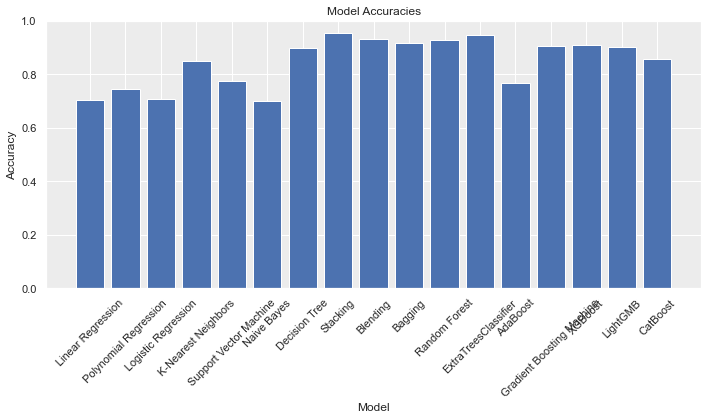

In [126]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()